In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [29]:
X, y = make_classification(n_features=5,n_informative=5,n_redundant=0,n_clusters_per_class=1)    

In [30]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])

In [31]:
df['target'] = y

In [32]:
df.head()

,col1,col2,col3,col4,col5,target
0,1.932718,-0.886236,-1.381584,2.863469,1.683990,1
1,-1.575519,1.080571,2.115929,1.760569,-0.968634,0
2,-0.624248,-0.763196,2.039323,4.715523,-2.426954,0
3,1.211638,-2.502936,0.228693,-0.330866,1.876578,1
4,5.003401,-0.593568,-0.672863,0.832282,0.986186,1


In [33]:
df.shape

(100, 6)

In [34]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [35]:
df.columns.tolist()[:-1]

['col1', 'col2', 'col3', 'col4', 'col5']

In [36]:
df[['col1', 'col2', 'col3', 'col4', 'col5']]

,col1,col2,col3,col4,col5
0,1.932718,-0.886236,-1.381584,2.863469,1.683990
1,-1.575519,1.080571,2.115929,1.760569,-0.968634
2,-0.624248,-0.763196,2.039323,4.715523,-2.426954
3,1.211638,-2.502936,0.228693,-0.330866,1.876578
4,5.003401,-0.593568,-0.672863,0.832282,0.986186
...,...,...,...,...,...
95,-0.778009,0.940175,0.716895,0.719329,0.483852
96,0.436678,0.554893,0.844600,-1.020648,1.593357
97,1.176985,-0.420143,2.935579,-0.043936,0.286287
98,-0.906280,1.009867,1.017602,0.754492,-1.070311


In [37]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

In [38]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

# **For Sample Rows**

In [39]:
df1 = sample_rows(df, 1)

df2 = sample_rows(df, 1)

df3 = sample_rows(df, 1)

In [40]:
df3.shape

(100, 6)

In [49]:
df1.head()

,col1,col2,col3,col4,col5,target
85,-1.167835,0.584862,2.594708,2.747968,-0.511915,1
10,0.113915,0.204276,-0.985796,1.260547,-1.892541,0
5,-1.337086,1.520240,1.529615,0.149532,0.932579,0
33,1.193946,-1.759377,1.244141,-0.905963,1.089343,1
89,-1.565856,1.542917,1.486587,0.652366,-1.158948,0


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [44]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df1.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df1.iloc[:, -1])

DecisionTreeClassifier()

In [45]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.9166666666666666, 'x[4] <= -0.522\ngini = 0.497\nsamples = 100\nvalue = [46, 54]'),
 Text(0.4583333333333333, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.625, 0.75, 'x[1] <= 0.918\ngini = 0.298\nsamples = 66\nvalue = [12, 54]'),
 Text(0.4166666666666667, 0.5833333333333334, 'x[1] <= 0.482\ngini = 0.101\nsamples = 56\nvalue = [3, 53]'),
 Text(0.25, 0.4166666666666667, 'x[4] <= 0.244\ngini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.16666666666666666, 0.25, 'x[0] <= 1.412\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 41\nvalue = [0, 41]'),
 Text(0.5833333333333334, 0.4166666666666667, 'x[2] <= 2.051\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.666666

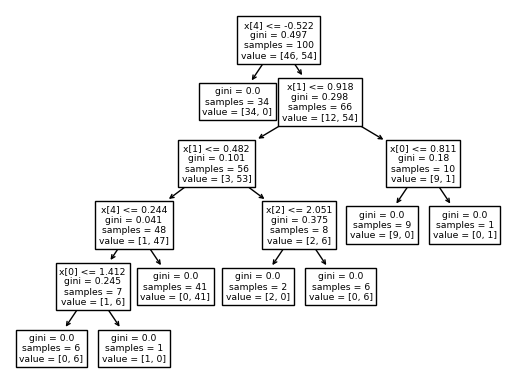

In [46]:
plot_tree(clf1)

[Text(0.6011029411764706, 0.95, 'x[0] <= 0.165\ngini = 0.497\nsamples = 100\nvalue = [46, 54]'),
 Text(0.35294117647058826, 0.85, 'x[1] <= 2.717\ngini = 0.43\nsamples = 48\nvalue = [15, 33]'),
 Text(0.29411764705882354, 0.75, 'x[3] <= 4.582\ngini = 0.381\nsamples = 43\nvalue = [11, 32]'),
 Text(0.2647058823529412, 0.65, 'x[3] <= 1.599\ngini = 0.363\nsamples = 42\nvalue = [10, 32]'),
 Text(0.14705882352941177, 0.55, 'x[4] <= -0.406\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.11764705882352941, 0.45, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.17647058823529413, 0.45, 'x[1] <= 1.862\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.14705882352941177, 0.35, 'x[4] <= 1.239\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.11764705882352941, 0.25, 'x[4] <= 0.475\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.058823529411764705, 0.15, 'x[3] <= -0.015\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.029411764705882353, 0.05, 'gini = 0.444\nsamples = 

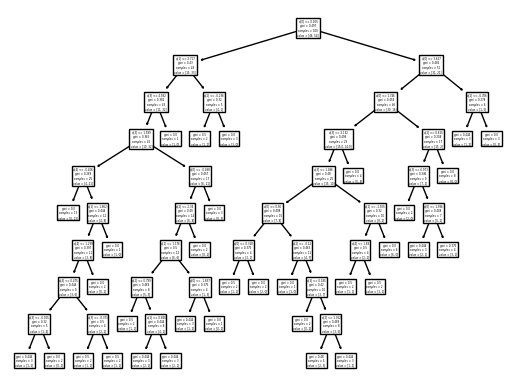

In [47]:
plot_tree(clf2)

[Text(0.6951754385964912, 0.9615384615384616, 'x[3] <= -2.009\ngini = 0.497\nsamples = 100\nvalue = [46, 54]'),
 Text(0.6600877192982456, 0.8846153846153846, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.7302631578947368, 0.8846153846153846, 'x[4] <= 1.33\ngini = 0.487\nsamples = 93\nvalue = [39.0, 54.0]'),
 Text(0.5307017543859649, 0.8076923076923077, 'x[3] <= 0.737\ngini = 0.499\nsamples = 79\nvalue = [38, 41]'),
 Text(0.23684210526315788, 0.7307692307692307, 'x[1] <= -1.223\ngini = 0.43\nsamples = 32\nvalue = [10, 22]'),
 Text(0.07017543859649122, 0.6538461538461539, 'x[3] <= -0.389\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.03508771929824561, 0.5769230769230769, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.10526315789473684, 0.5769230769230769, 'x[1] <= -1.377\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.07017543859649122, 0.5, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14035087719298245, 0.5, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Tex

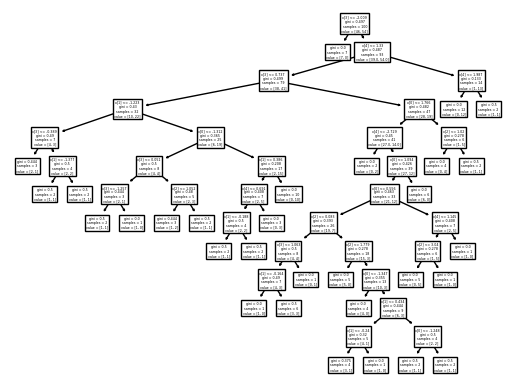

In [48]:
plot_tree(clf3)

In [53]:
clf1.predict(np.array([1.932718	,-0.886236	,-1.381584	,2.863469	,1.683990]).reshape(1,5))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [241]:
clf2.predict(np.array([-0.380376,	0.405291,	-1.774346,	-0.630461,	-0.487884]).reshape(1,5))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [58]:
clf3.predict(np.array([-0.380376,	0.405291,	-1.774346,	-0.630461,	-0.487884]).reshape(1,5))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but DecisionTreeClassifier is expecting 4 features as input.

# **For Sample Features**

In [59]:
df1 = sample_features(df, 0.8)

df2 = sample_features(df, 0.8)

df3 = sample_features(df, 0.8)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_7088\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_7088\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_7088\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [60]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [61]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:4], df1.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.359375, 0.9285714285714286, 'x[1] <= -0.362\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.125, 0.7857142857142857, 'x[2] <= 2.58\ngini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(0.0625, 0.6428571428571429, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.1875, 0.6428571428571429, 'x[0] <= -1.927\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.59375, 0.7857142857142857, 'x[0] <= -0.208\ngini = 0.299\nsamples = 60\nvalue = [11, 49]'),
 Text(0.4375, 0.6428571428571429, 'x[2] <= 2.924\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.375, 0.5, 'x[1] <= 0.945\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.3125, 0.35714285714285715, 'x[3] <= 2.584\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.21428571428571427, 'gini = 0.0\nsamples = 1\

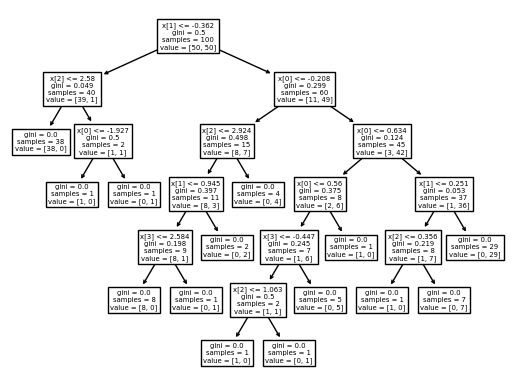

In [62]:
plot_tree(clf1)

[Text(0.4166666666666667, 0.9166666666666666, 'x[3] <= -0.362\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.13333333333333333, 0.75, 'x[1] <= 2.58\ngini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(0.06666666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 2.305\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.75, 'x[0] <= 0.687\ngini = 0.299\nsamples = 60\nvalue = [11, 49]'),
 Text(0.5333333333333333, 0.5833333333333334, 'x[3] <= 0.244\ngini = 0.117\nsamples = 48\nvalue = [3, 45]'),
 Text(0.4, 0.4166666666666667, 'x[1] <= 1.207\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.25, 'x[2] <= 3.13\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.26666666666666666, 0.08333333333333333, 'gini = 

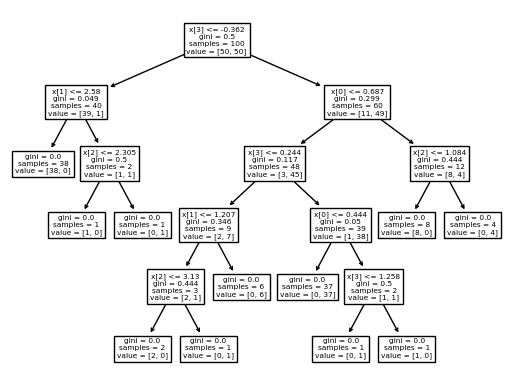

In [63]:
plot_tree(clf2)

[Text(0.4166666666666667, 0.9166666666666666, 'x[3] <= -0.362\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.13333333333333333, 0.75, 'x[2] <= 2.58\ngini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(0.06666666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.2, 0.5833333333333334, 'x[1] <= 2.305\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.75, 'x[0] <= 0.687\ngini = 0.299\nsamples = 60\nvalue = [11, 49]'),
 Text(0.5333333333333333, 0.5833333333333334, 'x[3] <= 0.244\ngini = 0.117\nsamples = 48\nvalue = [3, 45]'),
 Text(0.4, 0.4166666666666667, 'x[2] <= 1.207\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.25, 'x[0] <= -0.018\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.26666666666666666, 0.08333333333333333, 'gini 

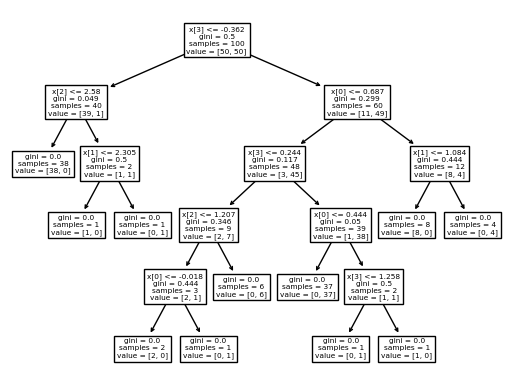

In [64]:
plot_tree(clf3)

# **For Combination**

In [65]:
df1 = combined_sampling(df, 0.5, 0.8)
df2 = combined_sampling(df, 0.5, 0.8)
df3 = combined_sampling(df, 0.5, 0.8)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_7088\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_7088\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_7088\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [66]:
df1.head()

,col3,col5,col1,col2,target
62,0.530632,-3.031211,-1.596050,0.797960,0
65,3.550361,-0.251495,-0.885783,0.564693,1
78,1.546243,-1.626837,-1.379414,1.734434,0
34,-0.841276,1.453525,0.382385,-1.751641,1
31,1.525320,-0.277140,-0.580159,0.767297,0


In [67]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [68]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:4], df1.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [69]:
clf1.predict(np.array([	1.932718	,-0.886236	,-1.381584	,2.863469	,1.683990]).reshape(1,4))

ValueError: cannot reshape array of size 5 into shape (1,4)

In [262]:
clf2.predict(np.array([3.599362,	-0.573313,	-0.963510,	-0.421577]).reshape(1,4))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [263]:
clf3.predict(np.array([3.599362,	-0.573313,	-0.963510,	-0.421577]).reshape(1,4))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])